In [1]:
from data_generators import get_train_test_addition

#dimensjoner og størrelser til x og y
n_digits = 2
n_max = 3*n_digits
m = 10

#definerer størrelsen på parametermatrisene
d = 15
k = 5
p = 20

#henter treningsdata
data = get_train_test_addition(n_digits,samples_per_batch=100,n_batches_train=4)

In [2]:
from utils import onehot

x = data['x_train'][0]
X = onehot(x,m)
y = data['y_train'][0]

In [3]:
data['x_train'].shape

(4, 100, 6)

In [4]:
from layers import LinearLayer,EmbedPosition,Attention,Softmax,CrossEntropy,FeedForward

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

In [5]:
#vi ser at dLdW_2 tilhørende ff1 (først finner vi det lineære laget l2
#så nøkkel 'w' i params dict-en, så nøkkel 'd' for å finne den deriverte)
#nå er denne bare en nullmatrise 
ff1.l2.params['w']['d']

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [6]:
#"manuelt" forward pass (tilsvarende algoritme 1)
z0 = embed.forward(X)
z1 = att1.forward(z0)
z2 = ff1.forward(z1)
z = un_embed.forward(z2)
Z = softmax.forward(z)

In [7]:
#evaluerer objektfunksjonen
L = loss.forward(Z,y)
print(L)

#finner den deriverte av objektfunksjonen mhp Z
dLdZ = loss.backward()

1.9923366891759422


In [8]:
#"manuelt" backward pass (tilsvarende algoritme 2)
dLdz = softmax.backward(dLdZ)
print('1')
dLdz2 = un_embed.backward(dLdz)
print('2')
dLdz1 = ff1.backward(dLdz2)
print('3')
dLdz0 = att1.backward(dLdz1)
print('4')
embed.backward(dLdz0)

(100, 10, 6)
1
2
3
(100, 6, 6)
4


c:\Users\tryme\Documents\GitHub\TMA4320-Introduksjon-til-vitenskapelige-beregninger-prosjekter\Prosjekt2-IndustriellMatematikk\layers.py:116: RuntimeWarning: invalid value encountered in matmul
  self.params["W_Q"]['d'] = np.einsum('abc, dce -> be',np.matmul(np.matmul(self.params["W_K"]['w'], self.x), np.transpose(grad_S, (0, 2, 1))), np.transpose(self.x, (0, 2, 1)), optimize = True)/self.b
c:\Users\tryme\Documents\GitHub\TMA4320-Introduksjon-til-vitenskapelige-beregninger-prosjekter\Prosjekt2-IndustriellMatematikk\layers.py:117: RuntimeWarning: invalid value encountered in matmul
  self.params["W_K"]['d'] = np.einsum('abc, dce -> be',np.matmul(np.matmul(self.params["W_Q"]['w'], self.x), grad_S), np.transpose(self.x, (0, 2, 1)), optimize = True)/self.b


In [9]:
#etter backward pass har dLdW_2 fått verdier
ff1.l2.params['w']['d']

array([[ 1.79029336e-01, -2.67614097e-02,  2.76798949e-01,
         2.54966498e-01,  1.16954627e-01,  4.63008831e-02,
         3.75868494e-01,  5.04406570e-01,  1.48006271e-01,
        -7.61692274e-02,  7.09844373e-02, -3.12044962e-02,
         1.70703496e-01,  4.34945407e-02, -4.19413476e-03,
         1.56365614e-02, -8.88374912e-03, -1.65808038e-01,
         2.07778009e-01,  3.52519817e-01],
       [-5.30350620e-01, -1.89672602e-01, -8.03575161e-01,
        -4.06372830e+00, -6.56304739e-01, -1.15503555e+00,
        -1.52973693e+00, -4.29842802e+00, -2.08796834e+00,
        -2.01549628e+00, -1.34432877e+00, -1.18852037e+00,
        -2.27486623e-01, -9.91815325e-02, -2.01286505e+00,
        -4.78386595e-01, -1.64781442e-01, -6.04416412e-01,
        -8.34309724e-01, -4.69790088e+00],
       [ 1.11162027e+00,  5.49626935e-02,  1.51195198e+00,
         1.63622285e+00,  1.39699338e+00,  8.68788977e-01,
         2.82862825e+00,  1.52889860e+00,  1.48819157e+00,
         8.01979232e-01,  5.9

In [10]:
from neural_network import NeuralNetwork

#vi kan samle lagene i en liste som vi bruker for å
#initialisere et nevralt nettverk der vi kan bruke forward() og backward() 
#for å oppnå det samme som vi gjorde manuelt over

layers = [embed,att1,ff1,un_embed,softmax]
nn = NeuralNetwork(layers)

In [11]:
#forward pass tilsvarende algoritme 1
Z = nn.forward(X)

#beregner loss med CrossEntropy
L = loss.forward(Z,y)
print(L)

#backward pass tilsvarende algoritme 2
dLdZ = loss.backward()
nn.backward(dLdZ)

1.9923366891759422
(100, 10, 6)
(100, 6, 6)


In [12]:
#før optimering er W_2[0,0] gitt ved
#ff1 er det tredje laget i layers-listen (derav layers[2])
W_2_pre_opt = nn.layers[2].l2.params['w']['w'].copy()
print(W_2_pre_opt[0,0])

0.014781286436417702


In [13]:
import numpy as np
def algorithm_4(x, y, m , d, p, k, n_max):
    n_iter = 100
    loss = CrossEntropy()
    L_arr = np.zeros(n_iter)
    feed_forward1 = FeedForward(d,p)
    attention1 = Attention(d,k)
    embed_pos = EmbedPosition(n_max,m,d)
    un_embed_pos = LinearLayer(d,m)
    softmax = Softmax()
    layers = [embed_pos, attention1,feed_forward1, un_embed_pos, softmax]
    nueralnet = NeuralNetwork(layers)

    alpha = 0.001
    Losses = []
    for j in range(1,n_iter):
        X = onehot(x, m)
        Z = nueralnet.forward(X) 
        Losses.append(loss.forward(Z,y))
        dLdz = loss.backward()
        nueralnet.backward(dLdz) 
        layers[0].step_gd(alpha)
        layers[1].step_adam(j, alpha)
        layers[2].step_gd(alpha)
        layers[3].step_adam(j, alpha)
        print(f'loss for iteration {j}: {loss.forward(Z,y)}') 
    return Losses   

arr = algorithm_4(x, y, m , d, p, k, n_max)

(100, 10, 6)
(100, 6, 6)
loss for iteration 1: 2.0723966517445973
(100, 10, 6)
(100, 6, 6)
loss for iteration 2: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 3: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 4: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 5: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 6: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 7: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 8: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 9: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 10: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 11: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 12: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 13: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 14: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 15: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 16: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 17: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 18: nan
(100, 10, 6)
(100, 6, 6)
loss for iteration 19: nan
(100, 

KeyboardInterrupt: 

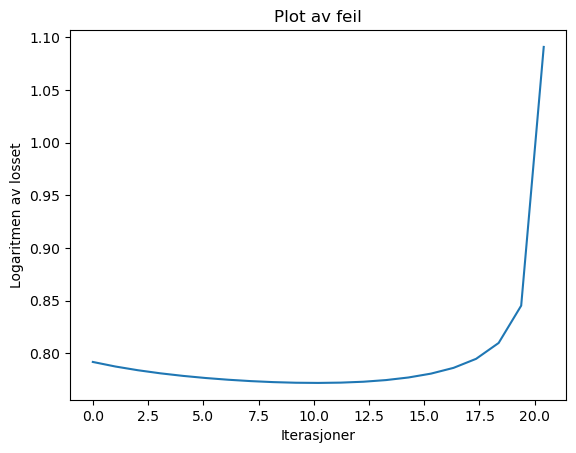

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,100,len(arr)),np.log(arr))
plt.xlabel('Iterasjoner')
plt.ylabel('Logaritmen av losset')
plt.title('Plot av feil')
plt.show()

In [ ]:
import numpy as np

xs = data['x_train']
ys = data['y_train']

n_batches = xs.shape[0]
n_iters = 100
step_size = 0.1


#treningsløkke tilsvarende algoritme 4 (med gradient descent)
for j in range(n_iters):
    losses = []
    for i in range(n_batches):
        x = xs[i]
        y = ys[i]

        X = onehot(x,m)
        Z = nn.forward(X)

        losses.append(loss.forward(Z,y))
        dLdZ = loss.backward()
        nn.backward(dLdZ)
        nn.step_gd(step_size)
    mean_loss = np.mean(losses)
    print("Iterasjon ", str(j), " L = ",mean_loss, "")

c:\Users\tryme\Documents\GitHub\TMA4320-Introduksjon-til-vitenskapelige-beregninger-prosjekter\Prosjekt2-IndustriellMatematikk\layers.py:178: RuntimeWarning: divide by zero encountered in log
  self.Q = -np.log(self.P)
c:\Users\tryme\Documents\GitHub\TMA4320-Introduksjon-til-vitenskapelige-beregninger-prosjekter\Prosjekt2-IndustriellMatematikk\layers.py:111: RuntimeWarning: invalid value encountered in add
  del_L += np.einsum('ab,bc, kcd, lde -> lae', np.transpose(self.params["W_Q"]['w']), self.params["W_K"]['w'], self.x, np.transpose(grad_S,(0,2,1)), optimize= True)
c:\Users\tryme\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iterasjon  0  L =  inf 
Iterasjon  1  L =  nan 
Iterasjon  2  L =  nan 
Iterasjon  3  L =  nan 
Iterasjon  4  L =  nan 
Iterasjon  5  L =  nan 
Iterasjon  6  L =  nan 
Iterasjon  7  L =  nan 
Iterasjon  8  L =  nan 
Iterasjon  9  L =  nan 
Iterasjon  10  L =  nan 
Iterasjon  11  L =  nan 
Iterasjon  12  L =  nan 
Iterasjon  13  L =  nan 
Iterasjon  14  L =  nan 
Iterasjon  15  L =  nan 
Iterasjon  16  L =  nan 
Iterasjon  17  L =  nan 
Iterasjon  18  L =  nan 
Iterasjon  19  L =  nan 
Iterasjon  20  L =  nan 
Iterasjon  21  L =  nan 
Iterasjon  22  L =  nan 
Iterasjon  23  L =  nan 
Iterasjon  24  L =  nan 
Iterasjon  25  L =  nan 
Iterasjon  26  L =  nan 
Iterasjon  27  L =  nan 
Iterasjon  28  L =  nan 
Iterasjon  29  L =  nan 
Iterasjon  30  L =  nan 
Iterasjon  31  L =  nan 
Iterasjon  32  L =  nan 
Iterasjon  33  L =  nan 
Iterasjon  34  L =  nan 
Iterasjon  35  L =  nan 
Iterasjon  36  L =  nan 
Iterasjon  37  L =  nan 
Iterasjon  38  L =  nan 
Iterasjon  39  L =  nan 
Iterasjon 

In [ ]:
#etter trening ser vi at W_2 er gitt ved

W_2_post_opt = nn.layers[2].l2.params['w']['w'].copy()
print(W_2_post_opt[0,0])

#dersom differansen er større enn null har dette parameteret endret seg etter 
#gradient descent
print(W_2_post_opt[0,0] - W_2_pre_opt[0,0])




-0.13857317601666091
-0.00010665015797989286
